In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the Dataset

In [29]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

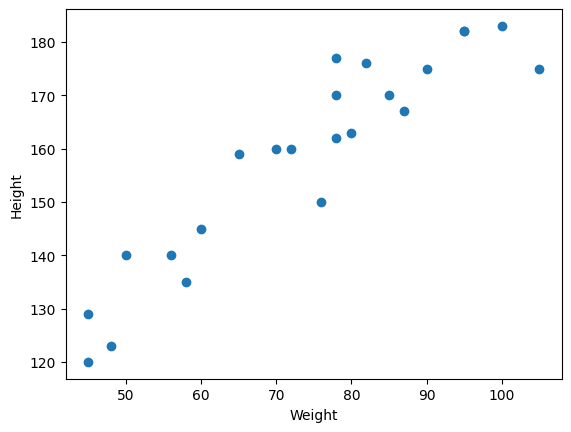

In [30]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [31]:
X = df[["Weight"]]
y = df["Height"]

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((18, 1), (5, 1))

### Standardize the data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 1.73689094]
 [-0.92026952]
 [ 1.4542143 ]
 [ 0.21043706]
 [-1.48562281]
 [ 1.17153765]
 [-1.6552288 ]
 [-0.80719886]
 [-0.24184557]
 [ 0.0973664 ]
 [-1.37255215]
 [-1.03334018]
 [-0.12877492]
 [ 0.88886101]
 [ 0.43657837]
 [ 0.60618436]
 [ 0.71925502]
 [ 0.32350772]]
[[ 0.21043706]
 [ 0.21043706]
 [-1.6552288 ]
 [ 1.17153765]
 [-0.52452222]]


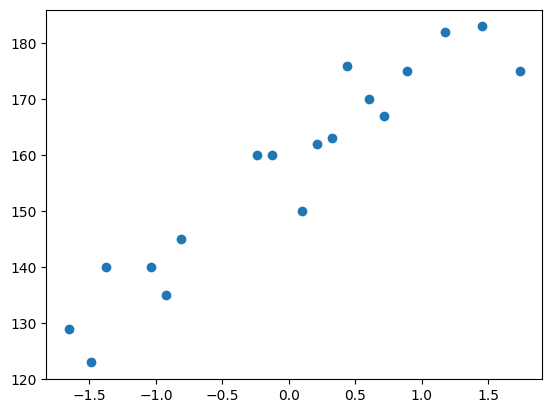

In [34]:
plt.scatter(X_train, y_train)

## Training the simple linear regression model

In [35]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
print("The Slope or Coefficient of weight is: ", regression.coef_)    # the number of independent features you have the number of coef you get

The Slope or Coefficient of weight is:  [17.03440872]


In [37]:
print("The Intercept is: ", regression.intercept_)

The Intercept is:  157.5


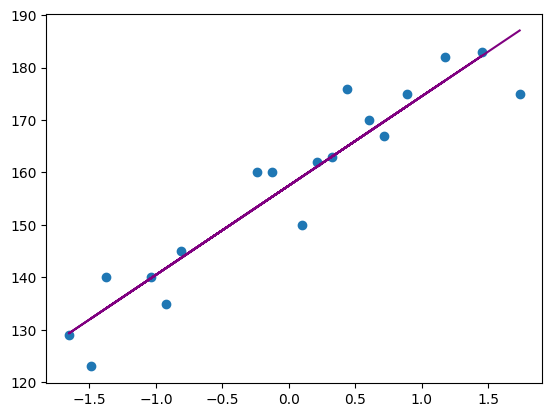

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color="purple")

#### prediction of train data  
1.predicted height output = intercept + coef_(weight)  
2.y_pred_train = 157.5 + 17.03(X_train)  

#### prediction of test data  
1.predicted height output = intercept + coef_(weight)  
2.y_pred_test = 157.5 + 17.03(X_test)

##### therefore the above coef_ and intercept_ that we calculated after standardiztion is used to calculate the prediction

In [41]:
y_pred_test = regression.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

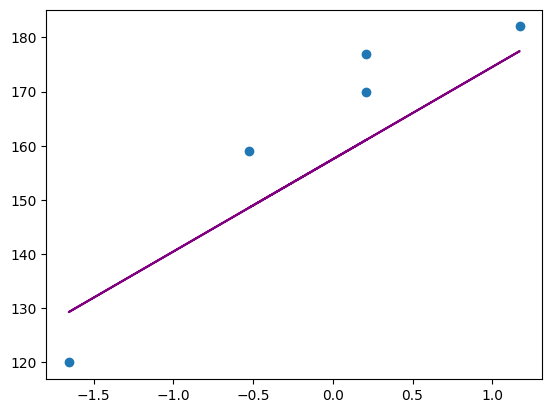

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color="purple")

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred_test)
Adjusted_r = 1-(1-score)*(len(y_test)-1)/((len(y_test))-X_train.shape[1]-1)
print(mse)  #for cost function the more the value is less the better the model
print(mae)
print(rmse)
# for accuracy of model we use r2_score and ajusted r2
print(score)
print(Adjusted_r) 

109.77592599051664
9.822657814519232
10.477400726827081
0.776986986042344
0.7026493147231252


In [48]:
print("Height Prediction For 80kg : ", regression.predict(scaler.transform([[80]])))

Height Prediction For 80kg :  [163.01076266]


c:\Users\patil\Desktop\AWS_Deployment_Simple_Linear_Regression\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### scatter plot for prediction

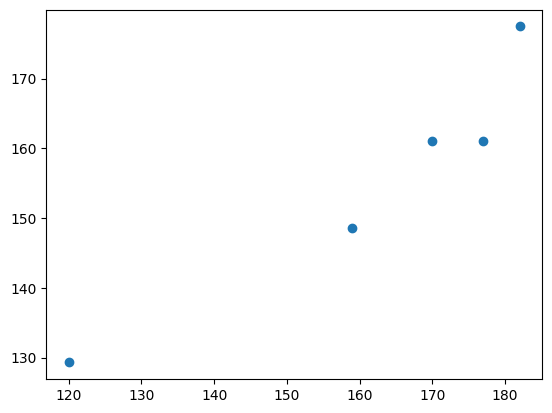

In [49]:
plt.scatter(y_test, y_pred_test)

## plotting residuls

In [54]:
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

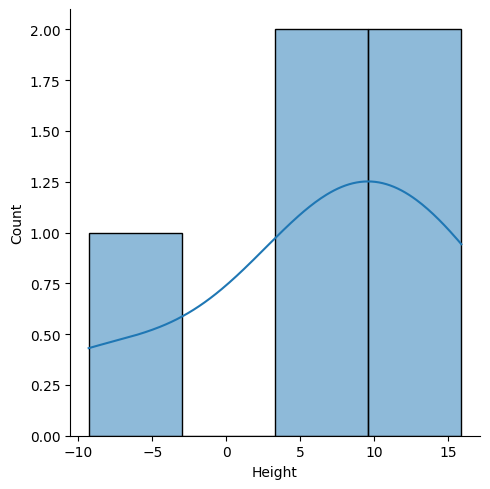

In [53]:
sns.displot(residuals, kde=True)

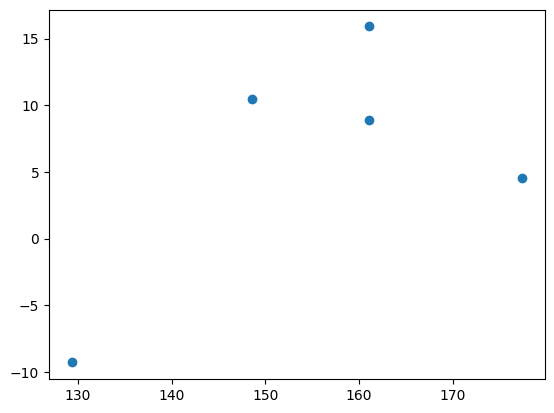

In [55]:
plt.scatter(y_pred_test, residuals)
# if the model with p_pred and residuals shows uniform distribution then model is good